<a href="https://colab.research.google.com/github/TammyJade/TJ/blob/main/Predicting_when_Mailing_Meters_Fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import library**


In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

**Acquire data**

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

In [ ]:
train_df

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,0,False,4.99,5.85,24.35,31.02,43.42,79.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/2021,10/6/2019
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,0,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,NaN,NaN,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/2021,10/27/2019
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,0,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/2021,10/31/2019
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,0,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/2021,10/1/2019
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,0,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/2021,9/13/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,26115,4.93,43.73,4.88,4.96,0.003333,-0.116667,4.84,78.84,3.49,3.43,0.036667,0.143333,1,True,4.37,4.70,5.08,5.12,16.72,21.08,27.87,52.15,33.16,57.94,4.95,3.25,4.71,3.63,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,-3.530000,0.016667,-0.283333,0.016667,0.323333,0.000000,85.333333,85.416667,60.166667,0.583333,370.822500,368.395000,13.363333,20.166667,4176.500000,19.500000,33.530000,4/1/2021,9/17/2019
5208,29793,4.50,26.15,20.80,39.00,-0.240000,-0.260000,3.97,56.58,35.19,77.19,-1.033333,0.760000,0,False,28.03,50.29,4.63,4.01,36.05,72.18,4.70,4.40,22.85,32.97,35.77,61.80,6.21,4.30,

**Cleaning data**

In [ ]:
# shape and data types of the data
print(train_df.shape)
print(train_df.dtypes)


(40500, 55)
deviceid                         int64
avg_time_charging_lag1         float64
avg_time_charging_lag2         float64
avg_time_charging_lag3         float64
avg_time_charging_lag7         float64
charging_rate_lag3             float64
charging_rate_lag7             float64
avg_time_discharging_lag1      float64
avg_time_discharging_lag2      float64
avg_time_discharging_lag3      float64
avg_time_discharging_lag7      float64
discharging_rate_lag3          float64
discharging_rate_lag7          float64
fail_7                           int64
charge_cycle_time_below_12        bool
avg_time_charging_lag4         float64
avg_time_discharging_lag4      float64
avg_time_charging_lag5         float64
avg_time_discharging_lag5      float64
avg_time_charging_lag6         float64
avg_time_discharging_lag6      float64
avg_time_charging_lag8         float64
avg_time_discharging_lag8      float64
avg_time_charging_lag9         float64
avg_time_discharging_lag9      float64
avg_time_char

In [ ]:
print(test_df.shape)
print(test_df.dtypes)

(4500, 54)
deviceid                         int64
avg_time_charging_lag1         float64
avg_time_charging_lag2         float64
avg_time_charging_lag3         float64
avg_time_charging_lag7         float64
charging_rate_lag3             float64
charging_rate_lag7             float64
avg_time_discharging_lag1      float64
avg_time_discharging_lag2      float64
avg_time_discharging_lag3      float64
avg_time_discharging_lag7      float64
discharging_rate_lag3          float64
discharging_rate_lag7          float64
charge_cycle_time_below_12        bool
avg_time_charging_lag4         float64
avg_time_discharging_lag4      float64
avg_time_charging_lag5         float64
avg_time_discharging_lag5      float64
avg_time_charging_lag6         float64
avg_time_discharging_lag6      float64
avg_time_charging_lag8         float64
avg_time_discharging_lag8      float64
avg_time_charging_lag9         float64
avg_time_discharging_lag9      float64
avg_time_charging_lag10        float64
avg_time_disch

In [ ]:
# select numeric columns
df_numeric = train_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)


['deviceid' 'avg_time_charging_lag1' 'avg_time_charging_lag2'
 'avg_time_charging_lag3' 'avg_time_charging_lag7' 'charging_rate_lag3'
 'charging_rate_lag7' 'avg_time_discharging_lag1'
 'avg_time_discharging_lag2' 'avg_time_discharging_lag3'
 'avg_time_discharging_lag7' 'discharging_rate_lag3'
 'discharging_rate_lag7' 'fail_7' 'avg_time_charging_lag4'
 'avg_time_discharging_lag4' 'avg_time_charging_lag5'
 'avg_time_discharging_lag5' 'avg_time_charging_lag6'
 'avg_time_discharging_lag6' 'avg_time_charging_lag8'
 'avg_time_discharging_lag8' 'avg_time_charging_lag9'
 'avg_time_discharging_lag9' 'avg_time_charging_lag10'
 'avg_time_discharging_lag10' 'avg_time_charging_lag11'
 'avg_time_discharging_lag11' 'avg_time_charging_lag12'
 'avg_time_discharging_lag12' 'avg_time_charging_lag13'
 'avg_time_discharging_lag13' 'avg_time_charging_lag14'
 'avg_time_discharging_lag14' 'discharging_rate_lag4'
 'discharging_rate_lag5' 'discharging_rate_lag6' 'discharging_rate_lag8'
 'charging_rate_lag4' 'ch

In [ ]:
# select non numeric columns
df_non_numeric = train_df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['charge_cycle_time_below_12' 'LastRecord' 'Date Deployed']


In [ ]:
#find out which column has missing value
# % of missing.
# train data set
for col in train_df.columns:
    pct_missing = np.mean(train_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

deviceid - 0%
avg_time_charging_lag1 - 0%
avg_time_charging_lag2 - 0%
avg_time_charging_lag3 - 0%
avg_time_charging_lag7 - 0%
charging_rate_lag3 - 0%
charging_rate_lag7 - 0%
avg_time_discharging_lag1 - 0%
avg_time_discharging_lag2 - 0%
avg_time_discharging_lag3 - 0%
avg_time_discharging_lag7 - 0%
discharging_rate_lag3 - 0%
discharging_rate_lag7 - 0%
fail_7 - 0%
charge_cycle_time_below_12 - 0%
avg_time_charging_lag4 - 0%
avg_time_discharging_lag4 - 0%
avg_time_charging_lag5 - 0%
avg_time_discharging_lag5 - 0%
avg_time_charging_lag6 - 0%
avg_time_discharging_lag6 - 0%
avg_time_charging_lag8 - 0%
avg_time_discharging_lag8 - 0%
avg_time_charging_lag9 - 1%
avg_time_discharging_lag9 - 1%
avg_time_charging_lag10 - 2%
avg_time_discharging_lag10 - 2%
avg_time_charging_lag11 - 4%
avg_time_discharging_lag11 - 4%
avg_time_charging_lag12 - 7%
avg_time_discharging_lag12 - 7%
avg_time_charging_lag13 - 11%
avg_time_discharging_lag13 - 11%
avg_time_charging_lag14 - 16%
avg_time_discharging_lag14 - 16%


In [ ]:
# test data set
for col in test_df.columns:
    pct_missing = np.mean(test_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

deviceid - 0%
avg_time_charging_lag1 - 0%
avg_time_charging_lag2 - 0%
avg_time_charging_lag3 - 0%
avg_time_charging_lag7 - 0%
charging_rate_lag3 - 0%
charging_rate_lag7 - 0%
avg_time_discharging_lag1 - 0%
avg_time_discharging_lag2 - 0%
avg_time_discharging_lag3 - 0%
avg_time_discharging_lag7 - 0%
discharging_rate_lag3 - 0%
discharging_rate_lag7 - 0%
charge_cycle_time_below_12 - 0%
avg_time_charging_lag4 - 0%
avg_time_discharging_lag4 - 0%
avg_time_charging_lag5 - 0%
avg_time_discharging_lag5 - 0%
avg_time_charging_lag6 - 0%
avg_time_discharging_lag6 - 0%
avg_time_charging_lag8 - 0%
avg_time_discharging_lag8 - 0%
avg_time_charging_lag9 - 1%
avg_time_discharging_lag9 - 1%
avg_time_charging_lag10 - 2%
avg_time_discharging_lag10 - 2%
avg_time_charging_lag11 - 4%
avg_time_discharging_lag11 - 4%
avg_time_charging_lag12 - 7%
avg_time_discharging_lag12 - 7%
avg_time_charging_lag13 - 12%
avg_time_discharging_lag13 - 12%
avg_time_charging_lag14 - 17%
avg_time_discharging_lag14 - 17%
discharging_

In [ ]:
# There is no missing value for our categorical data
# There is missing value for numeric data
# Train data set
for col in numeric_cols:
    missing = train_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        
        med = train_df[col].median()
        train_df[col] = train_df[col].fillna(med)

imputing missing values for: avg_time_charging_lag7
imputing missing values for: charging_rate_lag7
imputing missing values for: avg_time_discharging_lag7
imputing missing values for: discharging_rate_lag7
imputing missing values for: avg_time_charging_lag5
imputing missing values for: avg_time_discharging_lag5
imputing missing values for: avg_time_charging_lag6
imputing missing values for: avg_time_discharging_lag6
imputing missing values for: avg_time_charging_lag8
imputing missing values for: avg_time_discharging_lag8
imputing missing values for: avg_time_charging_lag9
imputing missing values for: avg_time_discharging_lag9
imputing missing values for: avg_time_charging_lag10
imputing missing values for: avg_time_discharging_lag10
imputing missing values for: avg_time_charging_lag11
imputing missing values for: avg_time_discharging_lag11
imputing missing values for: avg_time_charging_lag12
imputing missing values for: avg_time_discharging_lag12
imputing missing values for: avg_time_c

In [ ]:
# test data set
df_numeric = test_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = test_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        test_df['{}_ismissing'.format(col)] = missing
        med = test_df[col].median()
        test_df[col] = test_df[col].fillna(med)

imputing missing values for: avg_time_charging_lag7
imputing missing values for: charging_rate_lag7
imputing missing values for: avg_time_discharging_lag7
imputing missing values for: discharging_rate_lag7
imputing missing values for: avg_time_charging_lag5
imputing missing values for: avg_time_discharging_lag5
imputing missing values for: avg_time_charging_lag6
imputing missing values for: avg_time_discharging_lag6
imputing missing values for: avg_time_charging_lag8
imputing missing values for: avg_time_discharging_lag8
imputing missing values for: avg_time_charging_lag9
imputing missing values for: avg_time_discharging_lag9
imputing missing values for: avg_time_charging_lag10
imputing missing values for: avg_time_discharging_lag10
imputing missing values for: avg_time_charging_lag11
imputing missing values for: avg_time_discharging_lag11
imputing missing values for: avg_time_charging_lag12
imputing missing values for: avg_time_discharging_lag12
imputing missing values for: avg_time_c

**Analyze by describing data**

In [ ]:
train_df.head()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,0,False,4.99,5.85,24.35,31.02,43.42,79.33,5.78,5.92,5.77,5.93,5.79,5.94,5.84,6.07,5.83,6.06,5.83,6.06,5.84,6.11,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/2021,10/6/2019
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,0,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,5.84,6.11,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/2021,10/27/2019
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,0,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/2021,10/31/2019
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,0,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/2021,10/1/2019
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,0,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/2021,9/13/2019


In [ ]:
train_df.describe()  # Summary Stats 

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
count,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000
mean,27511.156593,16.274839,16.521473,16.277490,16.337855,-0.043389,-0.053002,25.800928,26.353566,25.903624,26.048305,-0.094954,-0.114888,0.232123,16.343948,26.082150,16.333162,26.055401,16.337247,26.067738,16.345806,26.047694,16.218438,25.876454,16.156612,25.704493,16.159111,25.756622,15.825421,25.136295,15.266062,24.047542,14.743803,23.023999,-0.108077,-0.100143,-0.089708,-0.118179,-0.039316,-0.038808,-0.047328,84.978399,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462
std,12992.647611,15.374342,15.425769,15.305041,15.131064,0.776305,0.756446,29.243961,29.459305,29.269789,28.984694,1.270488,1.324782,0.422193,15.208344,29.158269,15.196220,29.138422,15.143952,29.051824,15.122359,28.911288,14.919613,28.645138,14.860361,28.471591,14.838727,28.518855,14.651544,28.122307,14.362923,27.510408,14.115690,26.954144,1.385724,1.373807,1.322030,1.375208,0.720808,0.787685,0.818199,15.466961,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011
min,5000.000000,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,1.740000,-22.413333,-18.606667,0.000000,2.960000,2.110000,0.860000,1.960000,1.420000,2.430000,1.420000,0.850000,2.790000,0.040000,2.410000,2.140000,2.050000,1.850000,2.880000,0.020000,2.240000,0.080000,1.760000,0.370000,-58.820000,-61.173333,-29.996667,-47.583333,-17.450000,-56.886667,-85.763333,14.666667,14.416667,0.000000,0.090909,304.050833,298.250000,4.890000,4.131111,4112.454545,1.000000,9.021111
25%,16234.750000,4.910000,4.920000,4.900000,4.900000,-0.066667,-0.100000,4.200000,4.210000,4.200000,4.200000,-0.183333,-0.233333,0.000000,4.910000,4.210000,4.910000,4.200000,4.900000,4.210000,4.900000,4.200000,4.900000,4.200000,4.900000,4.210000,4.920000,4.230000,4.950000,4.250000,4.960000,4.270000,4.990000,4.350000,-0.190000,-0.206667,-0.203333,-0.240000,-0.086667,-0.086667,-0.090000,74.647059,74.500000,3.565217,1.052632,342.770532,339.267541,13.912625,21.418250,4151.666667,11.333333,35.364068
50%,27528.000000,5.770000,5.830000,5.780000,5.780000,0.000000,-0.003333,5.860000,5.920000,5.850000,5.890000,-0.003333,-0.003333,0.00000

In [ ]:
# Finding correlations between variables 
corrMatrix = train_df.corr()
print (corrMatrix)

                             deviceid  ...  cycle_time
deviceid                     1.000000  ...    0.001033
avg_time_charging_lag1       0.004142  ...    0.238768
avg_time_charging_lag2      -0.001142  ...    0.239353
avg_time_charging_lag3       0.002691  ...    0.241052
avg_time_charging_lag7       0.003595  ...    0.230744
charging_rate_lag3          -0.004674  ...    0.004052
charging_rate_lag7          -0.001515  ...    0.006446
avg_time_discharging_lag1    0.004854  ...    0.239316
avg_time_discharging_lag2   -0.000761  ...    0.242553
avg_time_discharging_lag3    0.002166  ...    0.243864
avg_time_discharging_lag7    0.004839  ...    0.232737
discharging_rate_lag3       -0.007265  ...   -0.008349
discharging_rate_lag7        0.002640  ...    0.003037
fail_7                      -0.004251  ...   -0.058233
charge_cycle_time_below_12   0.000475  ...   -0.186403
avg_time_charging_lag4      -0.004359  ...    0.237138
avg_time_discharging_lag4   -0.002377  ...    0.240096
avg_time_c

In [ ]:
# determine how variables correlate to "fail_7"(our prediction goal)
df = pd.DataFrame(corrMatrix, columns = ['fail_7'])
print(df)

                               fail_7
deviceid                    -0.004251
avg_time_charging_lag1      -0.014580
avg_time_charging_lag2      -0.003520
avg_time_charging_lag3      -0.001927
avg_time_charging_lag7       0.006473
charging_rate_lag3           0.025426
charging_rate_lag7          -0.004836
avg_time_discharging_lag1   -0.015220
avg_time_discharging_lag2   -0.003632
avg_time_discharging_lag3   -0.003412
avg_time_discharging_lag7    0.004956
discharging_rate_lag3        0.041993
discharging_rate_lag7       -0.006098
fail_7                       1.000000
charge_cycle_time_below_12   0.289355
avg_time_charging_lag4      -0.000002
avg_time_discharging_lag4    0.000938
avg_time_charging_lag5       0.006742
avg_time_discharging_lag5    0.006926
avg_time_charging_lag6      -0.001274
avg_time_discharging_lag6   -0.001032
avg_time_charging_lag8       0.000811
avg_time_discharging_lag8    0.001380
avg_time_charging_lag9       0.000275
avg_time_discharging_lag9    0.000878
avg_time_cha

In [ ]:
# convert index into column name 
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'predictors'})
print(df)

                     predictors    fail_7
0                      deviceid -0.004251
1        avg_time_charging_lag1 -0.014580
2        avg_time_charging_lag2 -0.003520
3        avg_time_charging_lag3 -0.001927
4        avg_time_charging_lag7  0.006473
5            charging_rate_lag3  0.025426
6            charging_rate_lag7 -0.004836
7     avg_time_discharging_lag1 -0.015220
8     avg_time_discharging_lag2 -0.003632
9     avg_time_discharging_lag3 -0.003412
10    avg_time_discharging_lag7  0.004956
11        discharging_rate_lag3  0.041993
12        discharging_rate_lag7 -0.006098
13                       fail_7  1.000000
14   charge_cycle_time_below_12  0.289355
15       avg_time_charging_lag4 -0.000002
16    avg_time_discharging_lag4  0.000938
17       avg_time_charging_lag5  0.006742
18    avg_time_discharging_lag5  0.006926
19       avg_time_charging_lag6 -0.001274
20    avg_time_discharging_lag6 -0.001032
21       avg_time_charging_lag8  0.000811
22    avg_time_discharging_lag8  0

In [ ]:
Predictors=df.head(53)
print(Predictors)

                     predictors    fail_7
0                      deviceid -0.004251
1        avg_time_charging_lag1 -0.014580
2        avg_time_charging_lag2 -0.003520
3        avg_time_charging_lag3 -0.001927
4        avg_time_charging_lag7  0.006473
5            charging_rate_lag3  0.025426
6            charging_rate_lag7 -0.004836
7     avg_time_discharging_lag1 -0.015220
8     avg_time_discharging_lag2 -0.003632
9     avg_time_discharging_lag3 -0.003412
10    avg_time_discharging_lag7  0.004956
11        discharging_rate_lag3  0.041993
12        discharging_rate_lag7 -0.006098
13                       fail_7  1.000000
14   charge_cycle_time_below_12  0.289355
15       avg_time_charging_lag4 -0.000002
16    avg_time_discharging_lag4  0.000938
17       avg_time_charging_lag5  0.006742
18    avg_time_discharging_lag5  0.006926
19       avg_time_charging_lag6 -0.001274
20    avg_time_discharging_lag6 -0.001032
21       avg_time_charging_lag8  0.000811
22    avg_time_discharging_lag8  0

In [ ]:
# sorting dataframe based on value in "fail_7" (correlation) to determine predictor variables
corr = Predictors.sort_values(by = 'fail_7',ascending=False)
print(corr)

                     predictors    fail_7
13                       fail_7  1.000000
14   charge_cycle_time_below_12  0.289355
46     avg_volt_change_charging  0.124680
47  avg_volt_change_discharging  0.123395
50              max_voltage_day  0.105511
42                 chargecycles  0.058489
43              dischargecycles  0.058476
11        discharging_rate_lag3  0.041993
5            charging_rate_lag3  0.025426
45         number_times_restart  0.022928
34   avg_time_discharging_lag14  0.020794
33      avg_time_charging_lag14  0.020534
30   avg_time_discharging_lag12  0.014744
29      avg_time_charging_lag12  0.014228
35        discharging_rate_lag4  0.010832
44               total_off_time  0.009120
51                   piececount  0.007645
18    avg_time_discharging_lag5  0.006926
17       avg_time_charging_lag5  0.006742
4        avg_time_charging_lag7  0.006473
28   avg_time_discharging_lag11  0.006319
40           charging_rate_lag5  0.006105
26   avg_time_discharging_lag10  0

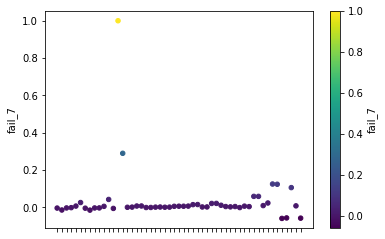

In [ ]:
Predictors.plot.scatter(x='predictors', y='fail_7', c='fail_7', colormap='viridis')

In [ ]:
# Plot the variable fail_7? How is the data distributed?

train_df['fail_7'].hist()

In [ ]:
train_df['charge_cycle_time_below_12'].hist()

In [ ]:
train_df['cycle_time'].hist()

In [ ]:
train_df['max_voltage_day'].hist()

In [ ]:
train_df['number_times_restart'].hist()

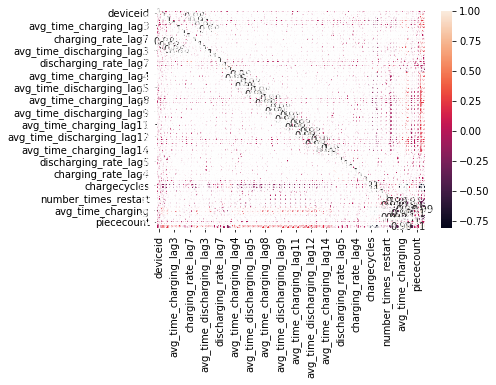

In [ ]:
sns.heatmap(train_df.corr(), annot=True )
plt.show()

**convert bool value to interger**

In [ ]:
train_df["charge_cycle_time_below_12"] = np.multiply(train_df["charge_cycle_time_below_12"], 1)  # Normalizing 
print(train_df["charge_cycle_time_below_12"])

0        0
1        0
2        0
3        0
4        1
        ..
40495    1
40496    1
40497    1
40498    1
40499    1
Name: charge_cycle_time_below_12, Length: 40500, dtype: int64


**feature importance selection**

In [ ]:
first_column = train_df.pop('fail_7')
  
# insert column using insert(position,column_name,
# first_column) function
train_df.insert(0, 'fail_7', first_column)

[0.01892628 0.01707738 0.0172454  0.01711974 0.01790434 0.01904267
 0.01680728 0.01712776 0.01725546 0.0172934  0.0177672  0.04027846
 0.01726213 0.07882413 0.01707181 0.01733088 0.01763126 0.01735563
 0.01729597 0.01737043 0.01759812 0.01782014 0.01737963 0.01757976
 0.01784687 0.01786421 0.01774765 0.01785845 0.01771321 0.01775438
 0.01782563 0.01742143 0.01832244 0.01813742 0.0171816  0.01723472
 0.01743632 0.01716837 0.0171434  0.0171095  0.01735133 0.01794139
 0.01765055 0.01865416 0.01856881 0.02416084 0.02342749 0.01824474
 0.01809798 0.02114651 0.01862532]


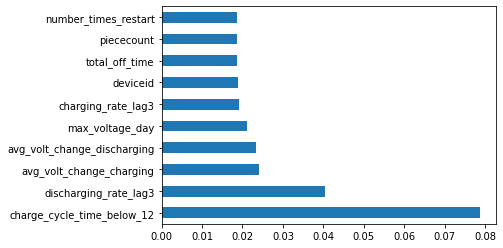

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = train_df.iloc[:,1:52]  #independent columns
y = train_df.iloc[:,0]    #target column 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Create a model and train it**

using the first variable "charge_cycle_time_below_12"


In [ ]:
train_df=train_df.rename(columns={"fail_7":"Y","charge_cycle_time_below_12": "x1"})

In [ ]:
x1=train_df.x1.values
x1=x1.reshape(-1,1) # converting from 1D array to 2D array
Y=train_df.Y

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

prediction_model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
prediction_model.fit(x1,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

evaluate the model 

In [ ]:
prediction_model.intercept_

array([-2.36799751])

In [ ]:
prediction_model.coef_

array([[1.67679186]])

In [ ]:
#get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥)
prediction_model.predict(x1)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#the accuracy of your model
prediction_model.score(x1,Y)

0.7678765432098765

**summary of model with first variable** 

In [ ]:
report=classification_report(Y, prediction_model.predict(x1))
print(report)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     31099
           1       0.00      0.00      0.00      9401

    accuracy                           0.77     40500
   macro avg       0.38      0.50      0.43     40500
weighted avg       0.59      0.77      0.67     40500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**StatsModels and Variable selection**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


one variable model



In [ ]:
x1=train_df.x1
Y=train_df.Y
x1 = sm.add_constant(x1)
sm_model = sm.Logit(Y, x1)

result = sm_model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.495575
         Iterations 6


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                40500
Model:                          Logit   Df Residuals:                    40498
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                 0.08537
Time:                        20:39:08   Log-Likelihood:                -20071.
converged:                       True   LL-Null:                       -21944.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3712      0.028    -85.331      0.000      -2.426      -2.317
x1             1.6803      0.031     54.226      0.000       1.620       1.741
==============================================================================
"""

**multivariate logistic regression**

In [ ]:
x2=train_df["discharging_rate_lag3"]
x3=train_df["avg_volt_change_charging"]
x4=train_df["avg_volt_change_discharging"]
x5=train_df["max_voltage_day"] 
x6=train_df["charging_rate_lag3"]
x7=train_df["total_off_time"]  
x8=train_df["number_times_restart"]
x9=train_df["deviceid"]
x10=train_df["piececount"]

In [ ]:
sm_model_2 = smf.mnlogit('Y ~ x1+x2+x3+x4+x5+x6+x7+x8+x9+x10 ', train_df)
result_2 = sm_model_2.fit(method='newton')

result_2.summary()

Optimization terminated successfully.
         Current function value: 0.487817
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      Y   No. Observations:                40500
Model:                        MNLogit   Df Residuals:                    40489
Method:                           MLE   Df Model:                           10
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                 0.09969
Time:                        20:39:12   Log-Likelihood:                -19757.
converged:                       True   LL-Null:                       -21944.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
       Y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2939     10.136      3.975      0.000      20.427      60.161
x1             1.6781      0.031     53.587      0.000       1.617       1.739
x2             0.0892      0.015      6.099      0.000       0.061       0.118
x3             0.0370      0.005      8.126      0.000       0.028       0.046
x4            -0.0047      0.004     -1.169      0.242      -0.013       0.003
x5            -0.0130      0.003     -4.977      0.000      -0.018      -0.008
x6             0.0750      0.028      2.677      0.007       0.020       0.130
x7            -0.0004      0.000     -1.127      0.260      -0.001       0.000
x8             0.0135      0.005      2.455      0.014       0.003       0.024
x9         -9.135e-07   9.56e-07     -0.955      0.339   -2.79e-06    9.61e-07
x10            0.0007      0.001      1.006      0.314      -0.001       0.002
==============================================================================
"""

**improve model by dropping insignificant variables**

In [ ]:
sm_model_final= smf.mnlogit('Y ~ x1+x2+x3+x5', train_df)
result_final = sm_model_final.fit(method='newton')

result_final.summary()

Optimization terminated successfully.
         Current function value: 0.488043
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      Y   No. Observations:                40500
Model:                        MNLogit   Df Residuals:                    40495
Method:                           MLE   Df Model:                            4
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                 0.09927
Time:                        20:39:15   Log-Likelihood:                -19766.
converged:                       True   LL-Null:                       -21944.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
       Y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.5462     10.102      3.915      0.000      19.747      59.345
x1             1.6766      0.031     53.620      0.000       1.615       1.738
x2             0.1033      0.014      7.505      0.000       0.076       0.130
x3             0.0322      0.002     14.017      0.000       0.028       0.037
x5            -0.0128      0.003     -4.919      0.000      -0.018      -0.008
==============================================================================
"""

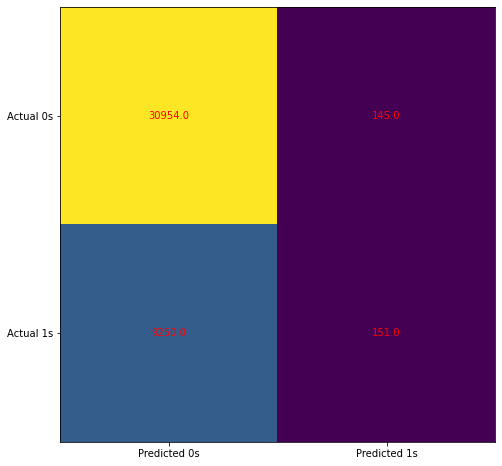

In [ ]:
cm=result_final.pred_table()
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
comf_m=result_final.pred_table()
comf_m

TN=comf_m[0,0]   
TP=comf_m[1,1]

Accuracy=(TP+TN)/40500
Accuracy 

0.7680246913580246

**predict on test data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_test=test_df[["charge_cycle_time_below_12","discharging_rate_lag3","avg_volt_change_charging","max_voltage_day"]]

X_train=train_df[["x1","discharging_rate_lag3","avg_volt_change_charging","max_voltage_day"]]

y_train=train_df[["Y"]]

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# create new column "fail_7" in test dataframe with prediction results
test_df["fail_7"]=y_pred

In [ ]:
# distribution of "1" and "0"

distribution= (test_df["fail_7"]).value_counts()
print(distribution)

0    4468
1      32
Name: fail_7, dtype: int64


save results to csv file

In [ ]:
test_df.to_csv('test.csv')